# Imports

In [2]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functionsML as f
from itertools import combinations
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LassoCV
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

from sklearn.preprocessing import MinMaxScaler

# data partition
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import importlib
importlib.reload(f)



<module 'functionsML' from 'c:\\Users\\ricar\\Documents\\GitHub\\ProjetoML\\functionsML.py'>

**Import data sets**

In [99]:
train_db = pd.read_csv("C:/Users/ricar/Desktop/cars4you/train.csv")
test_db = pd.read_csv("C:/Users/ricar/Desktop/cars4you/test.csv")

In [90]:
test_db

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,89856,Hyundai,I30,2022.878006,Automatic,30700.000000,petrol,205.0,41.5,1.6,61.0,3.0,0.0
1,106581,VW,Tiguan,2017.000000,Semi-Auto,-48190.655673,Petrol,150.0,38.2,2.0,60.0,2.0,0.0
2,80886,BMW,2 Series,2016.000000,Automatic,36792.000000,Petrol,125.0,51.4,1.5,94.0,2.0,0.0
3,100174,Opel,Grandland X,2019.000000,Manual,5533.000000,Petrol,145.0,44.1,1.2,77.0,1.0,0.0
4,81376,BMW,1 Series,2019.000000,Semi-Auto,9058.000000,Diesel,150.0,51.4,2.0,45.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32562,105775,VW,Tiguan,2017.000000,Manual,27575.000000,Petrol,145.0,46.3,1.4,94.0,1.0,0.0
32563,81363,BMW,X2,2020.000000,Automatic,1980.000000,Petrol,145.0,34.0,2.0,39.0,3.0,0.0
32564,76833,Audi,Q5,2019.000000,Semi-Auto,8297.000000,Diesel,145.0,38.2,2.0,88.0,4.0,0.0
32565,91768,Mercedes,A Class,2019.000000,Manual,-50755.210230,Petrol,145.0,28.5,1.3,81.0,1.0,0.0


### Data exploration

In [ ]:
train_db.head(15)

#typos in transmission and fuel
#engineSize with NaN
#mileage, mpg and previousOwners with irational values
#previousOwners with negative values
#hasDamage seems to always be 0

In [ ]:
train_db.describe(include='object')

In [ ]:
test_db.describe(include='object')

In [ ]:
train_db.describe()
#missing values in year mileage tax mpg engineSize paintQuality% previousOwners and hasDamage
#alarming min values in mileage tax mpg engineSize paintQuality% previousOwners
#alarming max values in year mpg paintQuality% previousOwners
#engineSize of max 6.6 can be realistic if the car is a truck
#hasDamage is always 0

In [ ]:
test_db.describe()
#missing values in year mileage tax mpg engineSize paintQuality% previousOwners and hasDamage
#alarming min values in mileage tax mpg engineSize paintQuality% previousOwners
#alarming max values in year mpg paintQuality% previousOwners
#engineSize of max 6.6 can be realistic if the car is a truck
#hasDamage is always 0

In [ ]:
train_db.info()
#year is float64, should be int64
#previousIwbers is float, should be int64

In [ ]:
test_db.info()
#year is float64, should be int64
#previousIwbers is float, should be int64

In [ ]:
f.missing_values_table(train_db)

In [ ]:
train_db[train_db["mpg"].isna()].head(10)

In [ ]:
train_db[train_db["tax"].isna()].head(10)

In [ ]:
train_db[train_db["hasDamage"].isna()].head(10)

In [ ]:
train_db[train_db["previousOwners"].isna()].head(10)

In [ ]:
train_db[train_db["paintQuality%"].isna()].head(10)

In [ ]:
train_db[train_db["transmission"].isna()].head(10)

In [ ]:
train_db[train_db["model"].isna()].head(10)

In [ ]:
train_db[train_db["Brand"].isna()].head(10)

In [ ]:
train_db[train_db["engineSize"].isna()].head(10)

In [ ]:
train_db[train_db["fuelType"].isna()].head(10)

In [ ]:
train_db[train_db["year"].isna()].head(10)

In [ ]:
train_db[train_db["mileage"].isna()].head(10)

In [ ]:
f.negative_values_table(train_db)

In [ ]:
train_db[train_db["tax"] < 0].head(10)

In [ ]:
train_db[train_db["tax"] < 0]["tax"].unique()[:10]

In [ ]:
train_db[train_db["mileage"] < 0].head(10)

In [ ]:
train_db[train_db["mileage"] < 0]["mileage"].unique()[:10]

In [ ]:
train_db[train_db["previousOwners"] < 0].head(10)

In [ ]:
train_db[train_db["previousOwners"] < 0]["previousOwners"].unique()[:10]

In [ ]:
train_db[train_db["engineSize"] < 0].head(10)

In [ ]:
train_db[train_db["engineSize"] < 0]["engineSize"].unique()[:10]

In [ ]:
train_db[train_db["mpg"] < 0].head(10)

In [ ]:
train_db[train_db["mpg"] < 0]["mpg"].unique()[:10]

In [ ]:
f.irrational_values_table(train_db)

**Unique Values**

In [90]:
# Loop through each column in the DataFrame
for column in train_db.columns:

    # Print unique values and count for columns with fewer than 20 unique values
    print(f"Unique values in '{column}': {train_db[column].unique()}")
    print(f"Number of unique values: {train_db[column].nunique()}\n")

#typos in every categorical variable
#different letter casing in every categorical variable
#unrealistic negative values and irrational values in every numerical category


Unique values in 'carID': [69512 53000  6366 ... 54886   860 15795]
Number of unique values: 75973

Unique values in 'Brand': ['VW' 'Toyota' 'Audi' 'Ford' 'BMW' 'Skoda' 'Opel' 'Mercedes' 'FOR'
 'mercedes' 'Hyundai' 'w' 'ord' 'MW' 'bmw' nan 'yundai' 'BM' 'Toyot' 'udi'
 'Ope' 'AUDI' 'V' 'opel' 'pel' 'For' 'pe' 'Mercede' 'audi' 'MERCEDES'
 'OPEL' 'koda' 'FORD' 'Hyunda' 'W' 'Aud' 'vw' 'hyundai' 'skoda' 'ford'
 'TOYOTA' 'ercedes' 'oyota' 'toyota' 'SKODA' 'Skod' 'HYUNDAI' 'kod' 'v'
 'for' 'SKOD' 'aud' 'KODA' 'PEL' 'yunda' 'or' 'UDI' 'OYOTA' 'HYUNDA' 'mw'
 'OPE' 'mercede' 'ERCEDES' 'ercede' 'TOYOT' 'MERCEDE' 'ORD' 'ud' 'ope'
 'AUD' 'hyunda' 'skod' 'toyot']
Number of unique values: 72

Unique values in 'model': [' Golf' ' Yaris' ' Q2' ' FIESTA' ' 2 Series' '3 Series' ' A3' ' Octavia'
 ' Passat' ' Focus' ' Insignia' ' A Clas' ' Q3' ' Fabia' ' A Class' ' Ka+'
 ' 3 Series' ' GLC Class' ' I30' ' C Class' ' Polo' ' E Class' ' C Clas'
 ' Q5' ' Up' ' Fiesta' ' C-HR' ' Mokka X' ' Corsa' ' Astra' ' TT'

**Correlation Matrix**

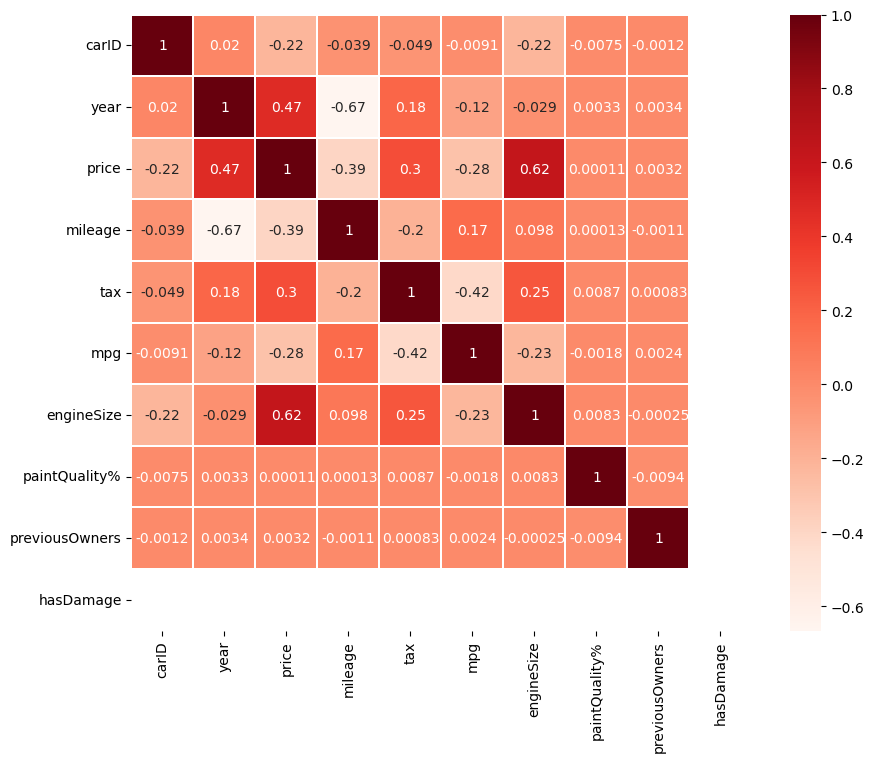

In [71]:
# Remove rows with missing values
temp = train_db.dropna()

# Select numerical columns for correlation analysis
corr_data = temp.select_dtypes(include=["number"])

# Compute the Pearson correlation matrix
correlation_matrix = corr_data.corr(method="pearson")

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap = plt.cm.Reds, linewidths=0.1)
plt.show()

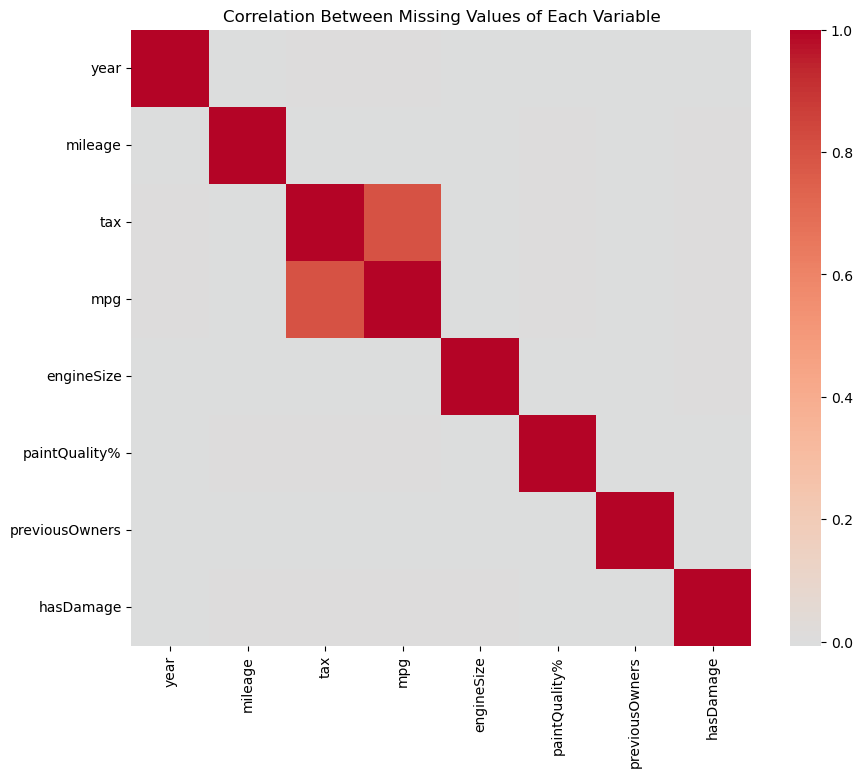

In [8]:

missing_mask = train_db.drop(columns=["carID", "price"], errors="ignore").select_dtypes(include=["number"]).isna()

missing_corr = missing_mask.corr()

# Plot the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(missing_corr, cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Between Missing Values of Each Variable")
plt.show()

## Distributions & Value Counts

In [41]:
train_db["Brand"].value_counts()

Brand
Ford        14808
Mercedes    10754
VW           9780
Opel         8645
BMW          6968
            ...  
OYOTA           2
SKOD            1
TOYOT           1
skod            1
toyot           1
Name: count, Length: 72, dtype: int64

In [42]:
train_db["model"].value_counts()

model
 Focus        6353
 C Class      4886
 Fiesta       4130
 Golf         3081
 Corsa        2182
              ... 
M5               1
 gls class       1
Mokka            1
 6 Serie         1
 JETTA           1
Name: count, Length: 735, dtype: int64

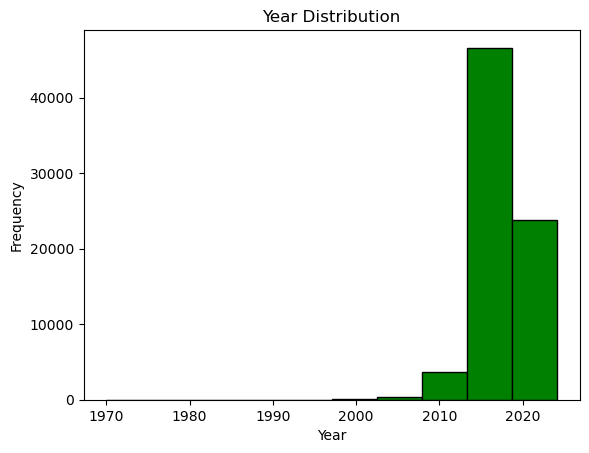

In [92]:
# Plot histogram for the "year" column
f.plot_histogram(train_db["year"], 
                 "Year",         # x-axis label
                 "Frequency",   # y-axis label
                 "Year Distribution")  # title of the plot

In [101]:
train_db["transmission"].value_counts()

transmission
Manual       38050
Semi-Auto    15545
Automatic    14003
anual          804
MANUAL         801
manual         770
Manua          759
unknown        690
 Manual        366
Semi-Aut       332
emi-Auto       325
semi-auto      324
utomatic       313
SEMI-AUTO      309
Automati       304
AUTOMATIC      289
automatic      282
unknow          18
Manual          16
UNKNOWN         14
ANUAL           13
nknown          13
anua            12
SEMI-AUT        11
MANUA           11
emi-auto        10
 MANUAL          9
EMI-AUTO         7
 Manual          7
automati         6
utomati          6
 manual          6
AUTOMATI         6
emi-Aut          5
Other            5
semi-aut         4
manua            2
UTOMATIC         2
manual           1
nknow            1
Name: count, dtype: int64

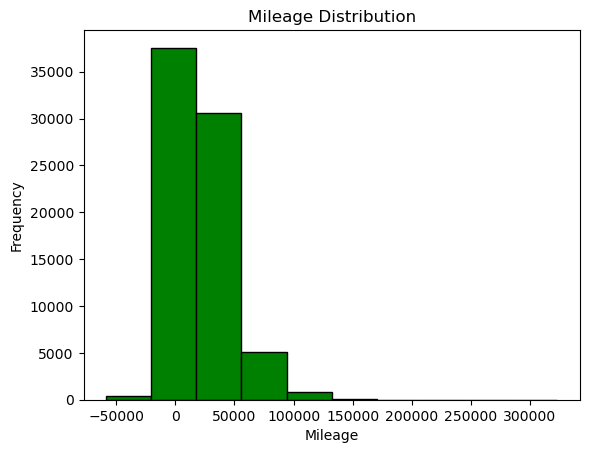

In [93]:
# Plot histogram for the "mileage" column
f.plot_histogram(train_db["mileage"], 
                 "Mileage",         # x-axis label
                 "Frequency",   # y-axis label
                 "Mileage Distribution")  # title of the plot

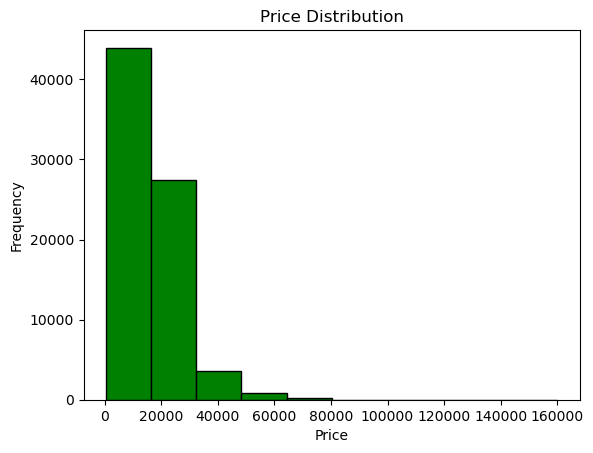

In [32]:
# Plot histogram for the "price" column
f.plot_histogram(train_db["price"], 
                 "Price",         # x-axis label
                 "Frequency",   # y-axis label
                 "Price Distribution")  # title of the plot

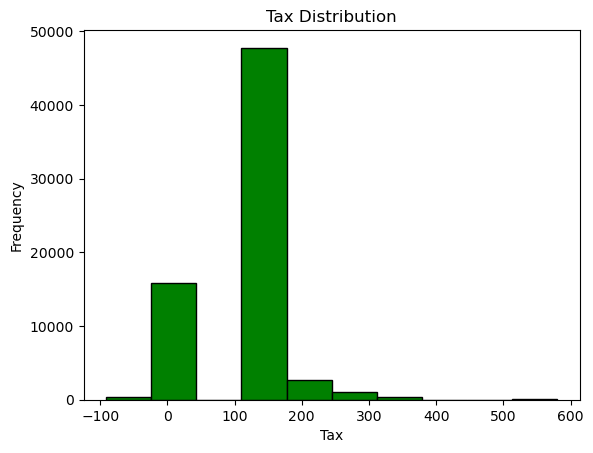

In [94]:
# Plot histogram for the "tax" column
f.plot_histogram(train_db["tax"], 
                 "Tax",         # x-axis label
                 "Frequency",   # y-axis label
                 "Tax Distribution")  # title of the ploty

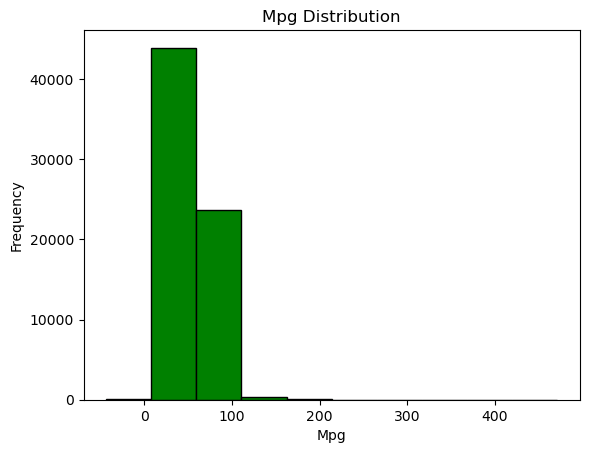

In [95]:
# Plot histogram for the "mpg" column
f.plot_histogram(train_db["mpg"], 
                 "Mpg",         # x-axis label
                 "Frequency",   # y-axis label
                 "Mpg Distribution")  # title of the ploty

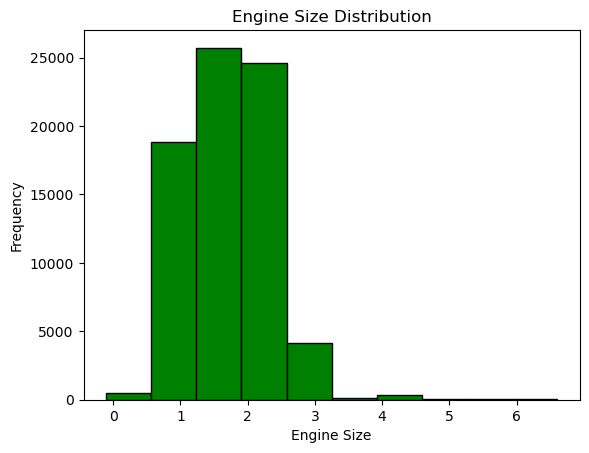

In [96]:
# Plot histogram for the "engineSize" column
f.plot_histogram(train_db["engineSize"], 
                 "Engine Size",         # x-axis label
                 "Frequency",   # y-axis label
                 "Engine Size Distribution")  # title of the ploty

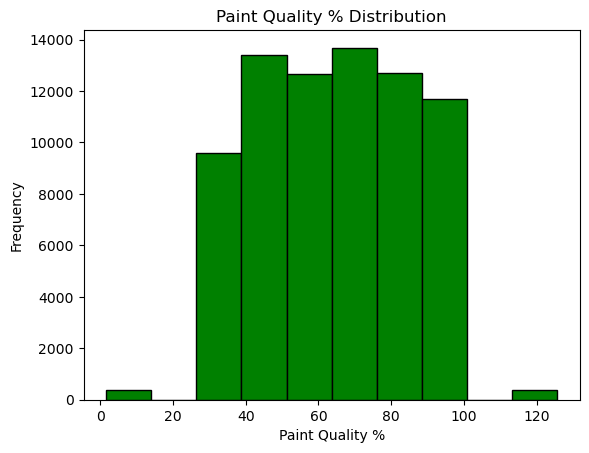

In [97]:
# Plot histogram for the "paintQuality%" column
f.plot_histogram(train_db["paintQuality%"], 
                 "Paint Quality %",         # x-axis label
                 "Frequency",   # y-axis label
                 "Paint Quality % Distribution")  # title of the ploty

## Fixing issues

In [100]:

# Drop irrelevant column
train_db = train_db.drop(columns="hasDamage")

train_db_numerical = train_db.select_dtypes(exclude=["object"]).columns
# Lowercase text columns
text_cols = train_db.select_dtypes(include=["object"]).columns
train_db[text_cols] = train_db[text_cols].apply(lambda x: x.str.lower() if x.dtype=="object" else x)


# Loop and fix all categorical columns
for col in train_db.select_dtypes(include="object").columns:
    train_db = f.fix_typos(col, train_db)


In [44]:
Q1 = train_db["paintQuality%"].quantile(0.25)
Q3 = train_db["paintQuality%"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(Q1)
print(Q3)


47.0
82.0


In [45]:
print("Outlier detection for Car dataset:")
f.IQR_outliers(train_db, train_db_numerical)

Outlier detection for Car dataset:
carID: 0 outliers
year: 1791 outliers
price: 2695 outliers
mileage: 3617 outliers
tax: 20306 outliers
mpg: 1200 outliers
engineSize: 716 outliers
paintQuality%: 0 outliers
previousOwners: 734 outliers


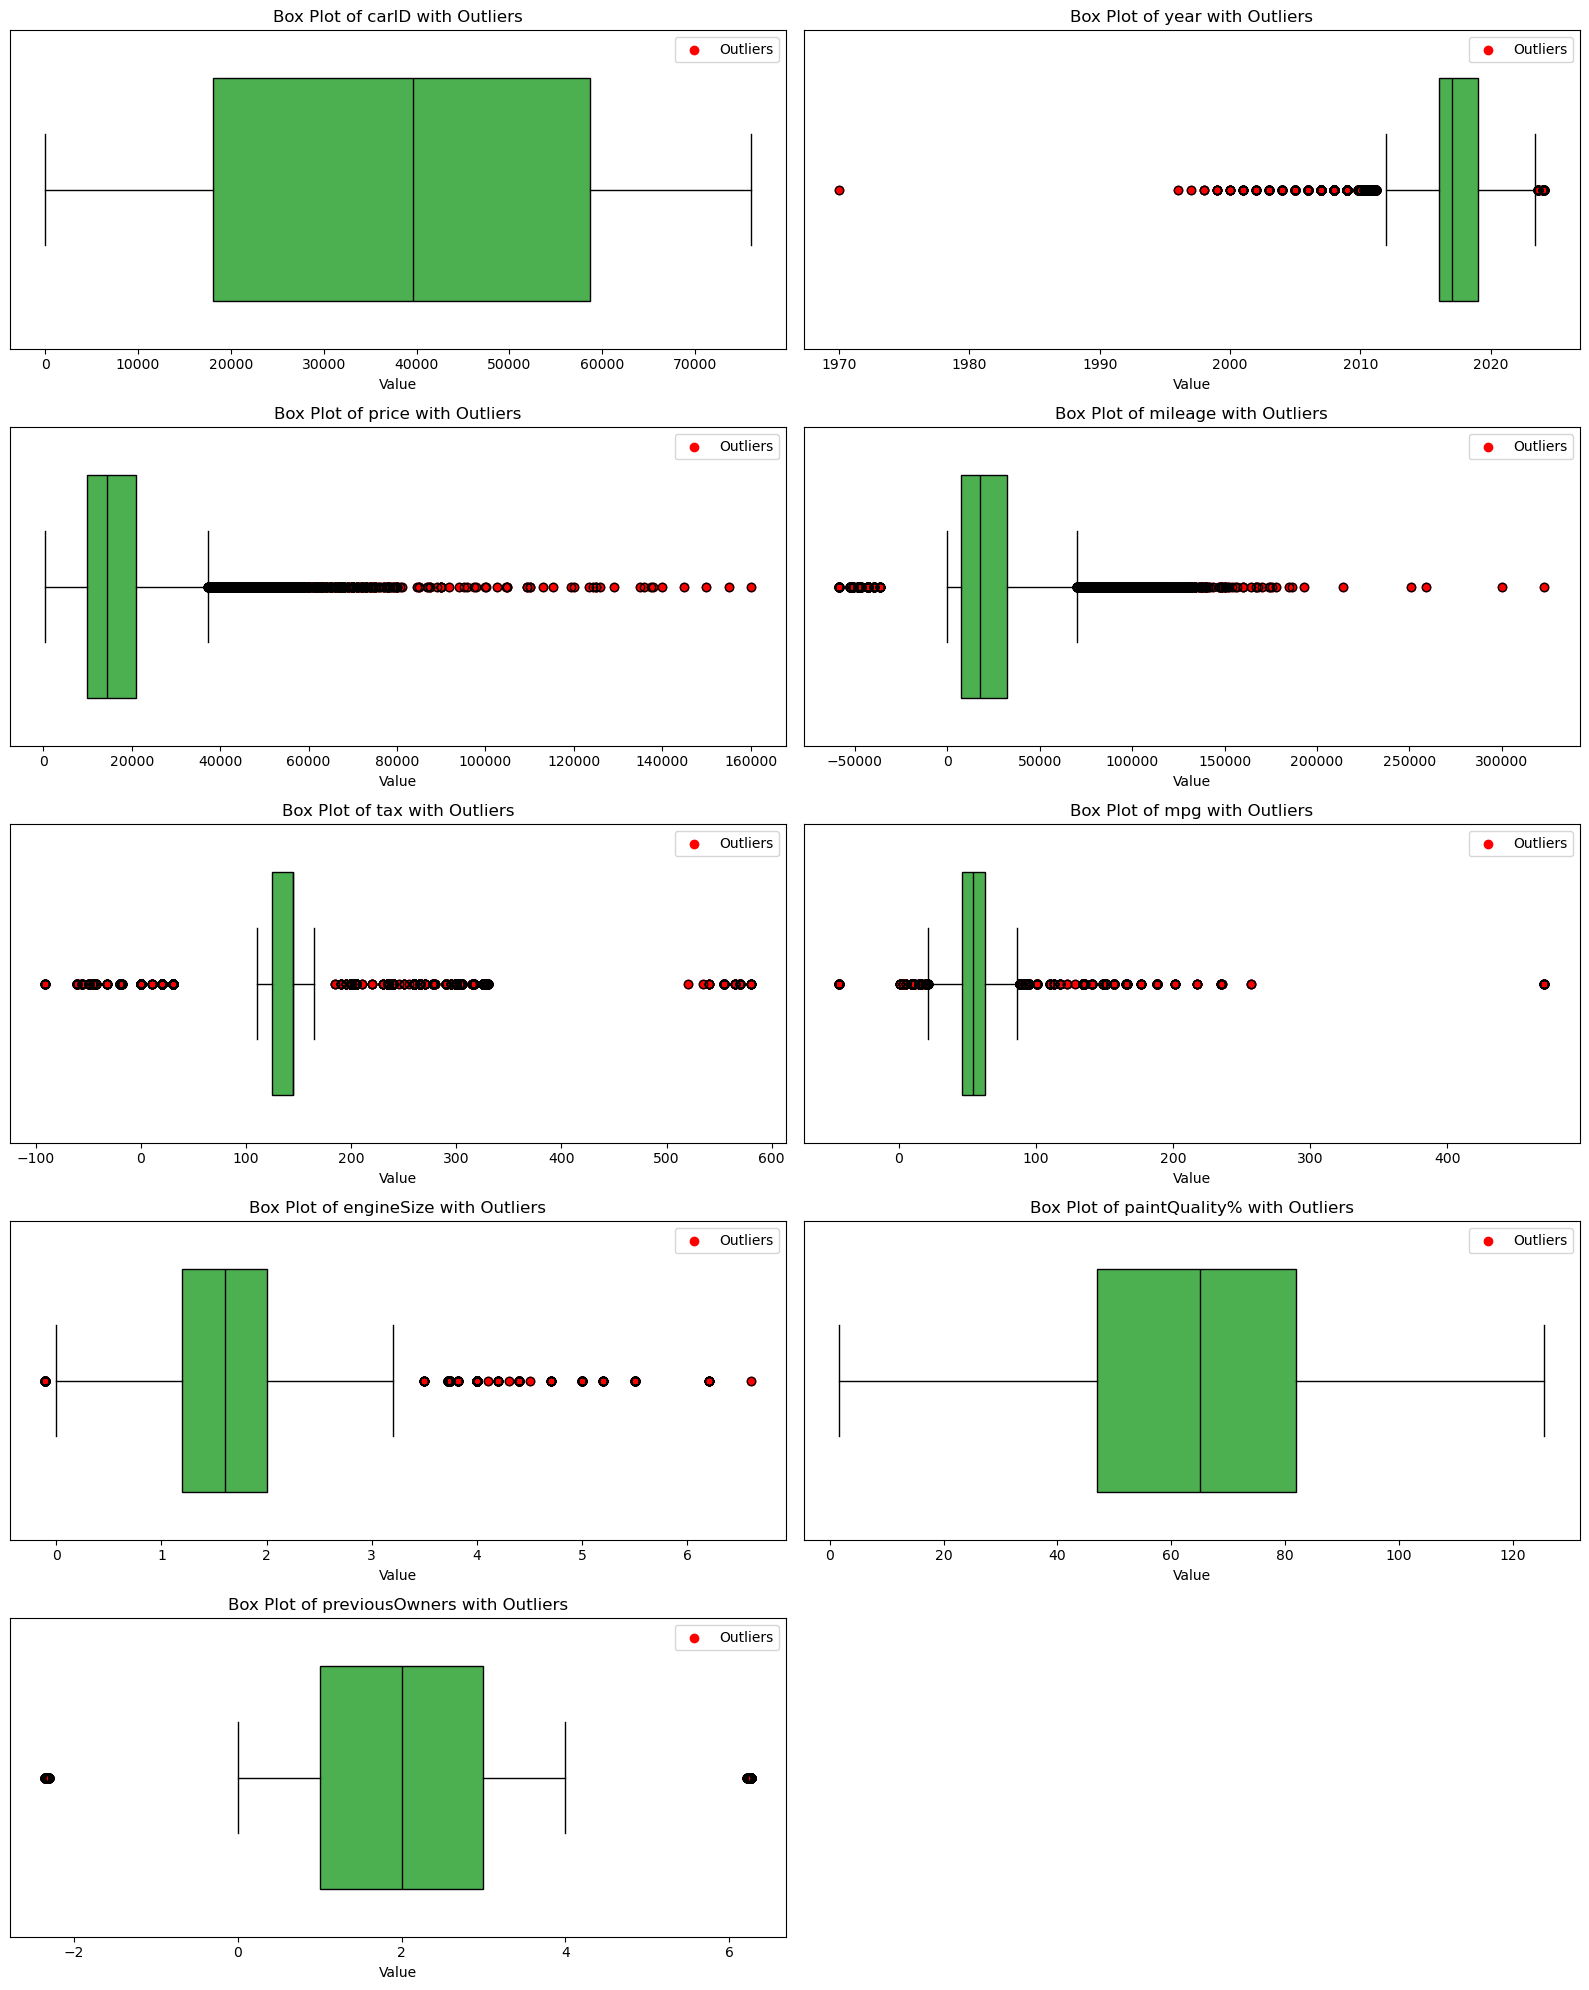

In [ ]:
f.plot_multiple_boxes_with_outliers(train_db.dropna(), train_db_numerical)

In [101]:
# Apply filtering rules to training data
train_db.loc[train_db["mileage"] < 0, "mileage"] = np.nan
train_db.loc[train_db["tax"] < 0, "tax"] = np.nan
train_db.loc[~train_db["mpg"].between(0, 150), "mpg"] = np.nan
train_db.loc[~train_db["engineSize"].between(1, 6), "engineSize"] = np.nan
train_db.loc[train_db["paintQuality%"] > 100, "paintQuality%"] = np.nan
train_db.loc[~train_db["year"].between(1990, 2020), "year"] = np.nan
train_db.loc[~train_db["previousOwners"].between(0, 4), "previousOwners"] = np.nan


In [38]:
(train_db["engineSize"]<1).value_counts()

engineSize
False    58089
True       440
Name: count, dtype: int64

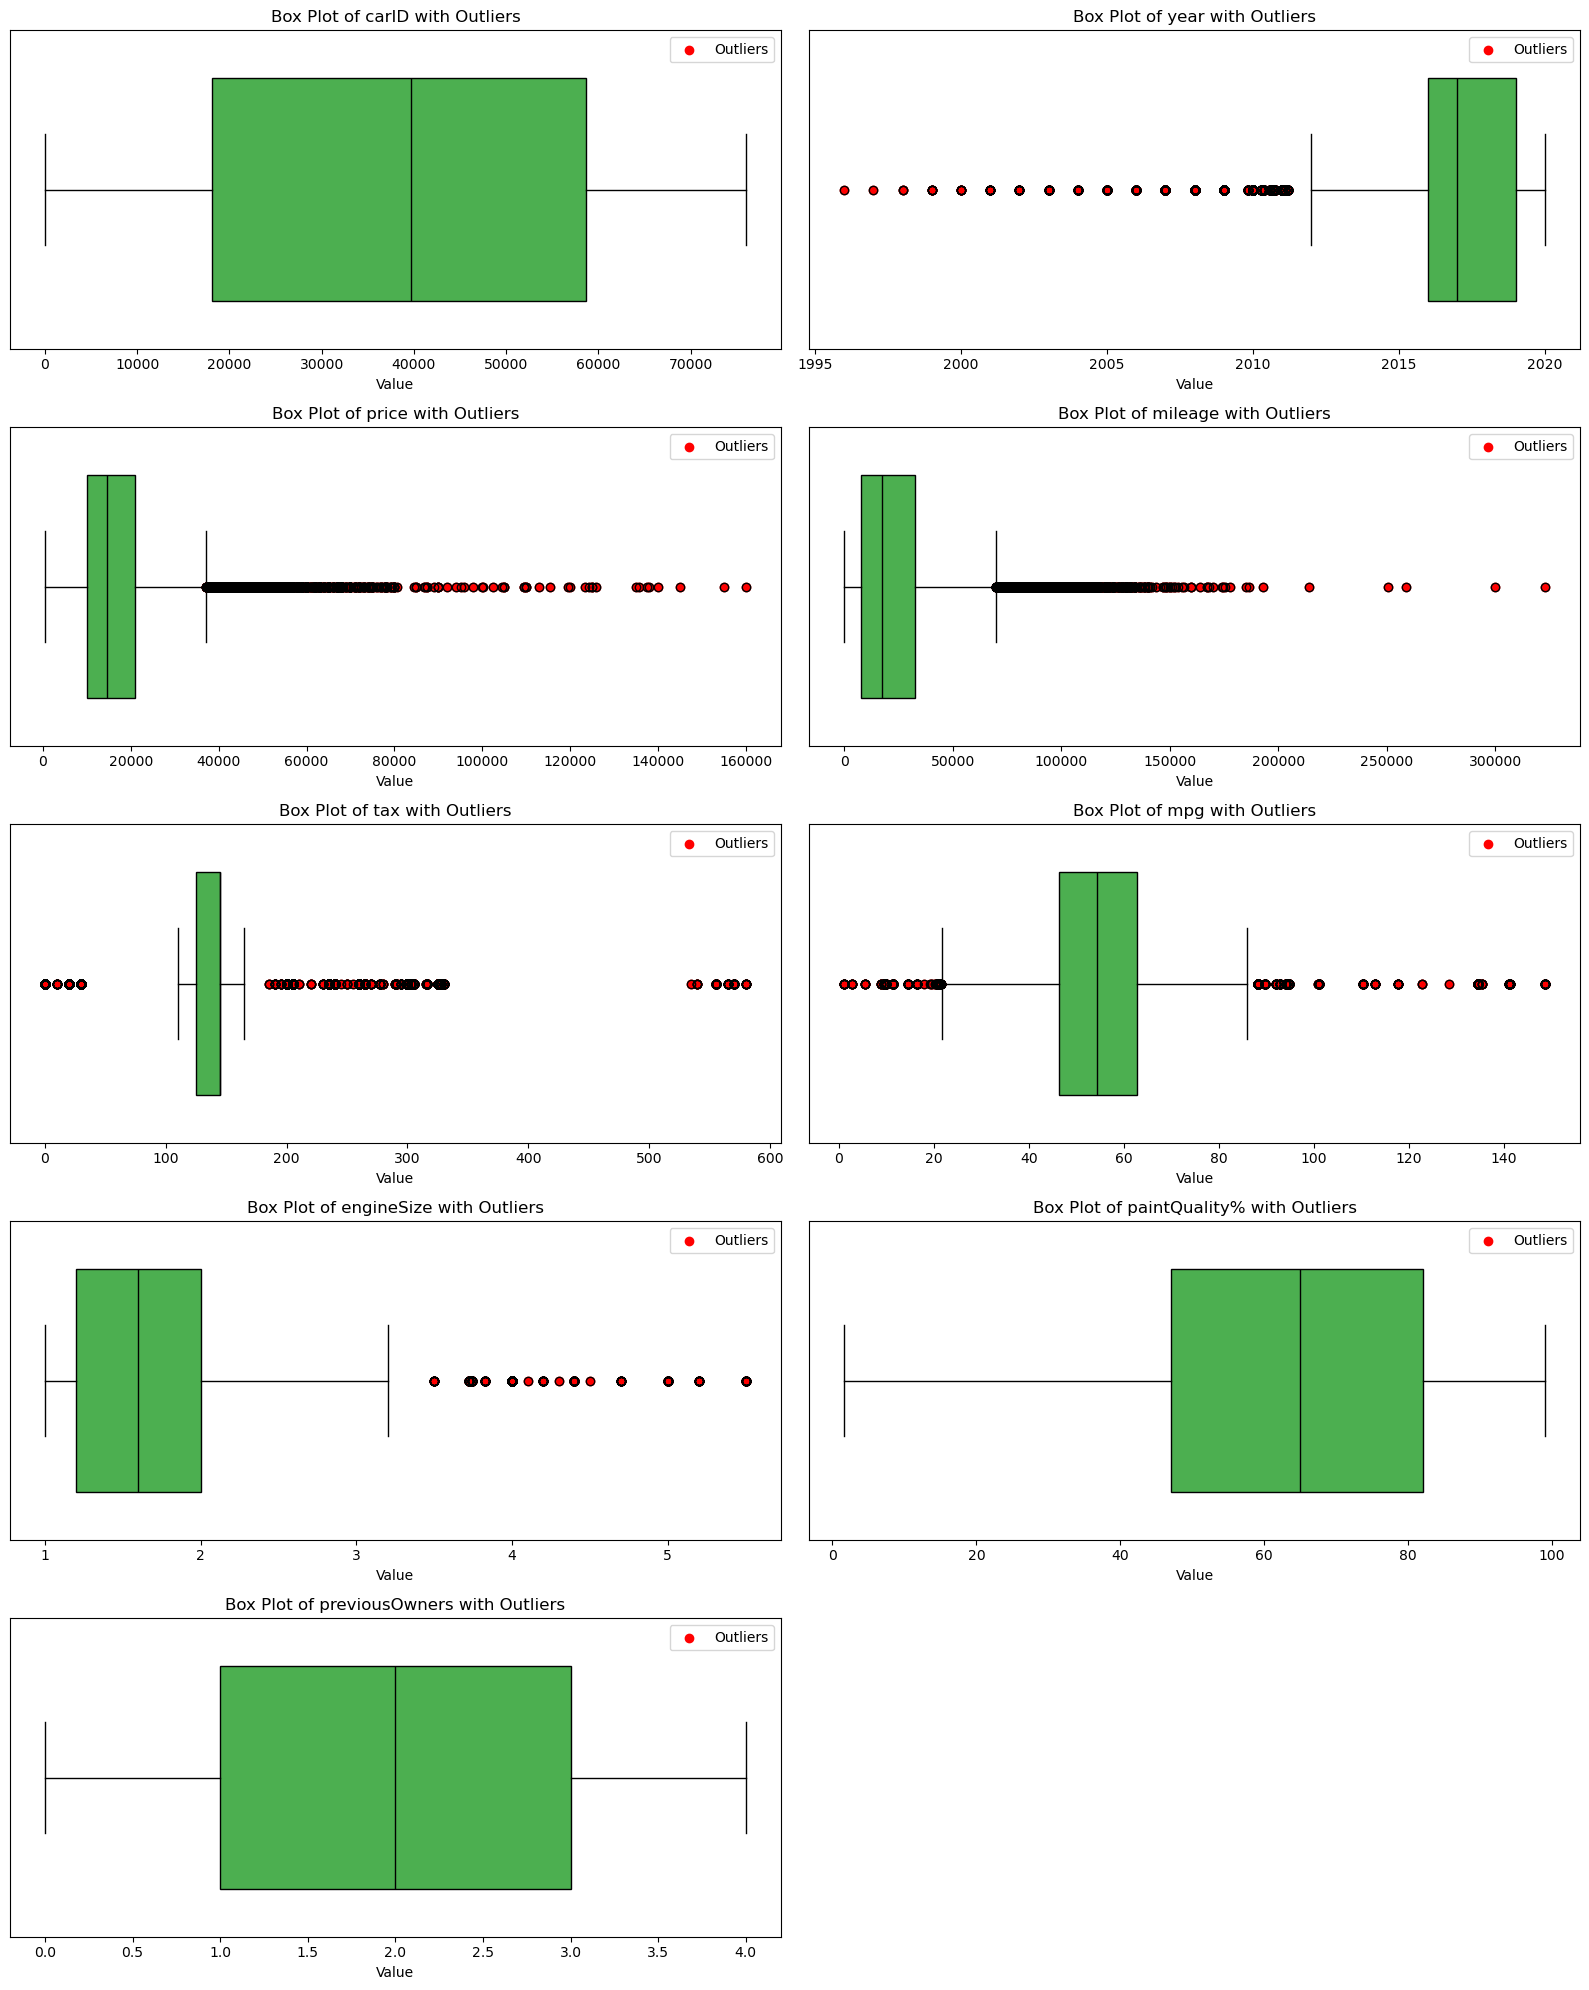

In [ ]:
f.plot_multiple_boxes_with_outliers(train_db.dropna(), train_db_numerical)

In [47]:
# Filter and display all rows where tax > 500
high_tax_entries = train_db[train_db['tax'] > 500]
high_tax_entries

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners
795,2522,audi,sq7,2009.0,8995,automatic,136000.0,NaN,540.0,31.0,3.000000,66.0,1.0
3046,24745,ford,mustang,2017.0,28000,semi-auto,23179.0,petrol,570.0,23.5,5.000000,63.0,1.0
3812,12545,bmw,x5,2011.0,15980,automatic,46000.0,petrol,570.0,22.6,4.400000,80.0,3.0
3954,42387,mercedes,m class,2011.0,7995,automatic,131000.0,diesel,555.0,31.0,3.723712,65.0,3.0
4784,13600,bmw,6 series,2006.0,4999,automatic,126054.0,petrol,555.0,29.7,3.000000,80.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74462,56446,opel,antara,2007.0,2999,automatic,99500.0,diesel,565.0,32.8,2.000000,87.0,3.0
74756,12984,bmw,m5,2015.0,29795,automatic,28500.0,petrol,565.0,28.5,4.400000,89.0,1.0
74824,44623,mercedes,m class,2011.0,10990,automatic,69000.0,diesel,555.0,32.5,3.000000,69.0,3.0
75225,3596,audi,rs6,2014.0,44491,automatic,43752.0,petrol,555.0,28.8,4.000000,71.0,3.0


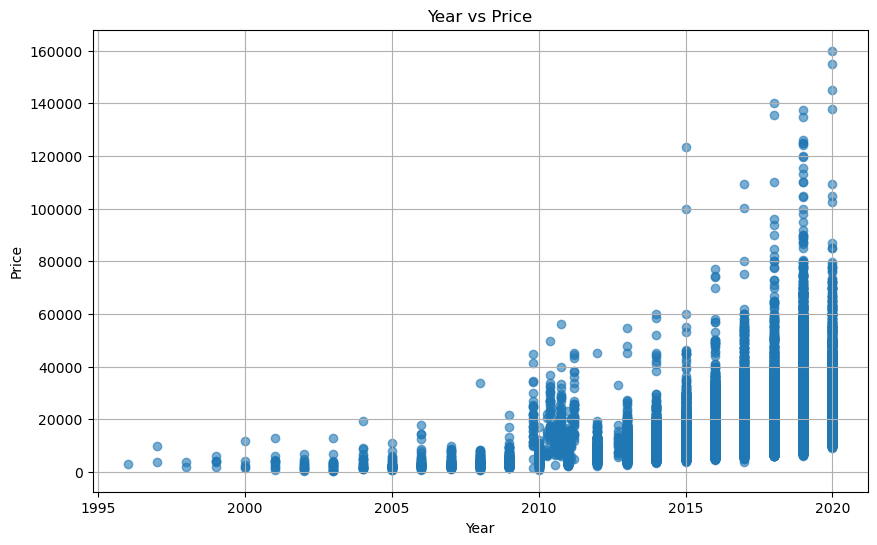

In [48]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(train_db['year'], train_db['price'], alpha=0.6)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Year vs Price')
plt.grid(True)
plt.show()


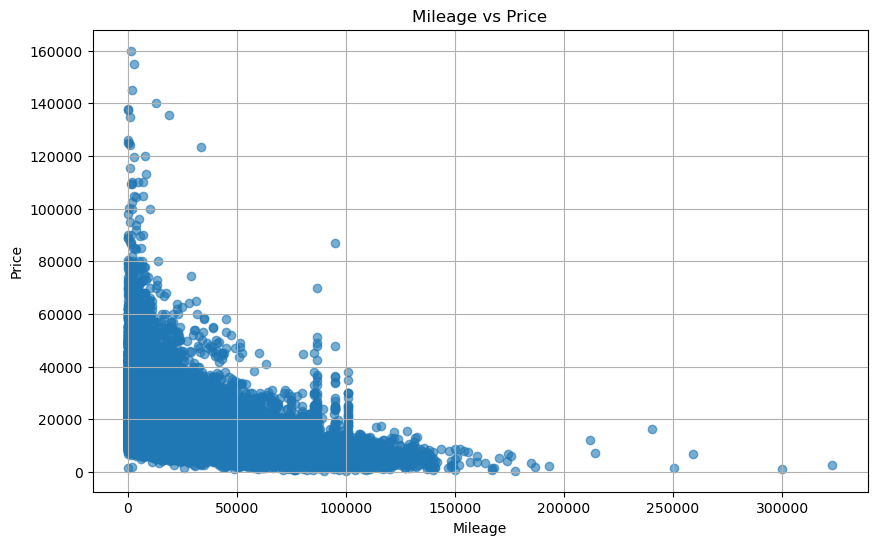

In [10]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(train_db['mileage'], train_db['price'], alpha=0.6)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price')
plt.grid(True)
plt.show()


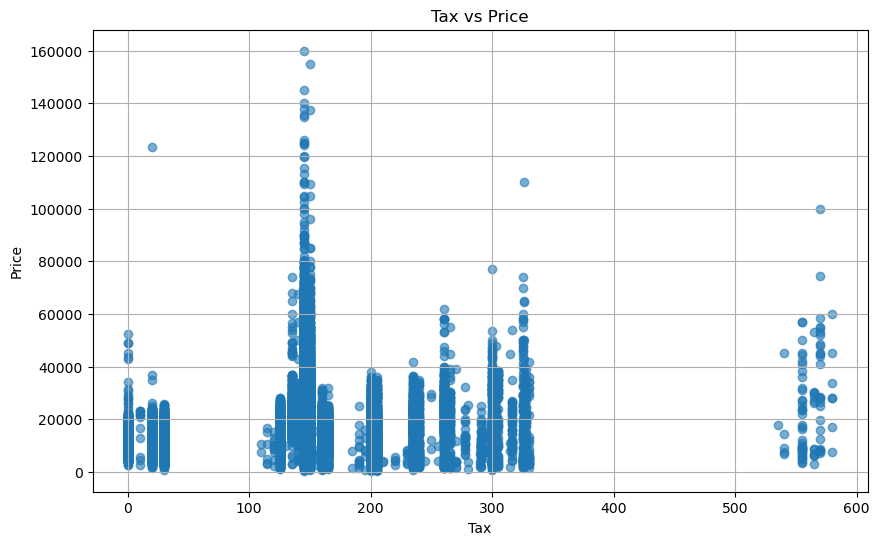

In [11]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(train_db['tax'], train_db['price'], alpha=0.6)
plt.xlabel('Tax')
plt.ylabel('Price')
plt.title('Tax vs Price')
plt.grid(True)
plt.show()



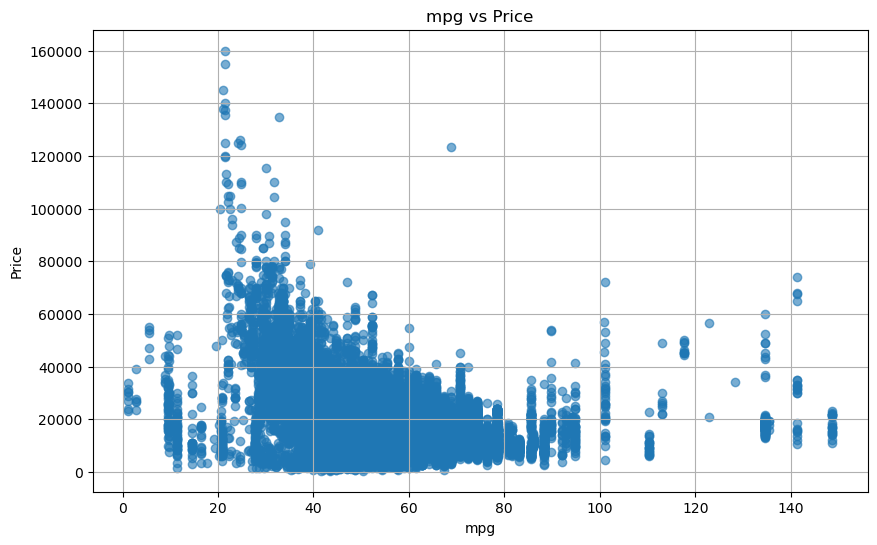

In [12]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(train_db['mpg'], train_db['price'], alpha=0.6)
plt.xlabel('mpg')
plt.ylabel('Price')
plt.title('mpg vs Price')
plt.grid(True)
plt.show()


In [102]:
train_db['price'] = np.log1p(train_db['price'])
train_db['mileage'] = np.log1p(train_db['mileage'])
train_db['mpg'] = np.log1p(train_db['mpg'])

lower, upper = train_db['tax'].quantile([0.01, 0.99])
train_db['tax'] = train_db['tax'].clip(lower, upper)
train_db['tax'] = np.log1p(train_db['tax'])

lower_es, upper_es = train_db['engineSize'].quantile([0.01, 0.99])
train_db['engineSize'] = train_db['engineSize'].clip(lower, upper)

# Save these values from your TRAIN data preprocessing
train_thresholds = {
    'tax_lower': lower,           # The 'lower' from train_db['tax'].quantile([0.01, 0.99])
    'tax_upper': upper,           # The 'upper' from train_db['tax'].quantile([0.01, 0.99])
    'engineSize_lower': lower_es, # The 'lower' from train_db['engineSize'].quantile([0.01, 0.99])  
    'engineSize_upper': upper_es  # The 'upper' from train_db['engineSize'].quantile([0.01, 0.99])
}


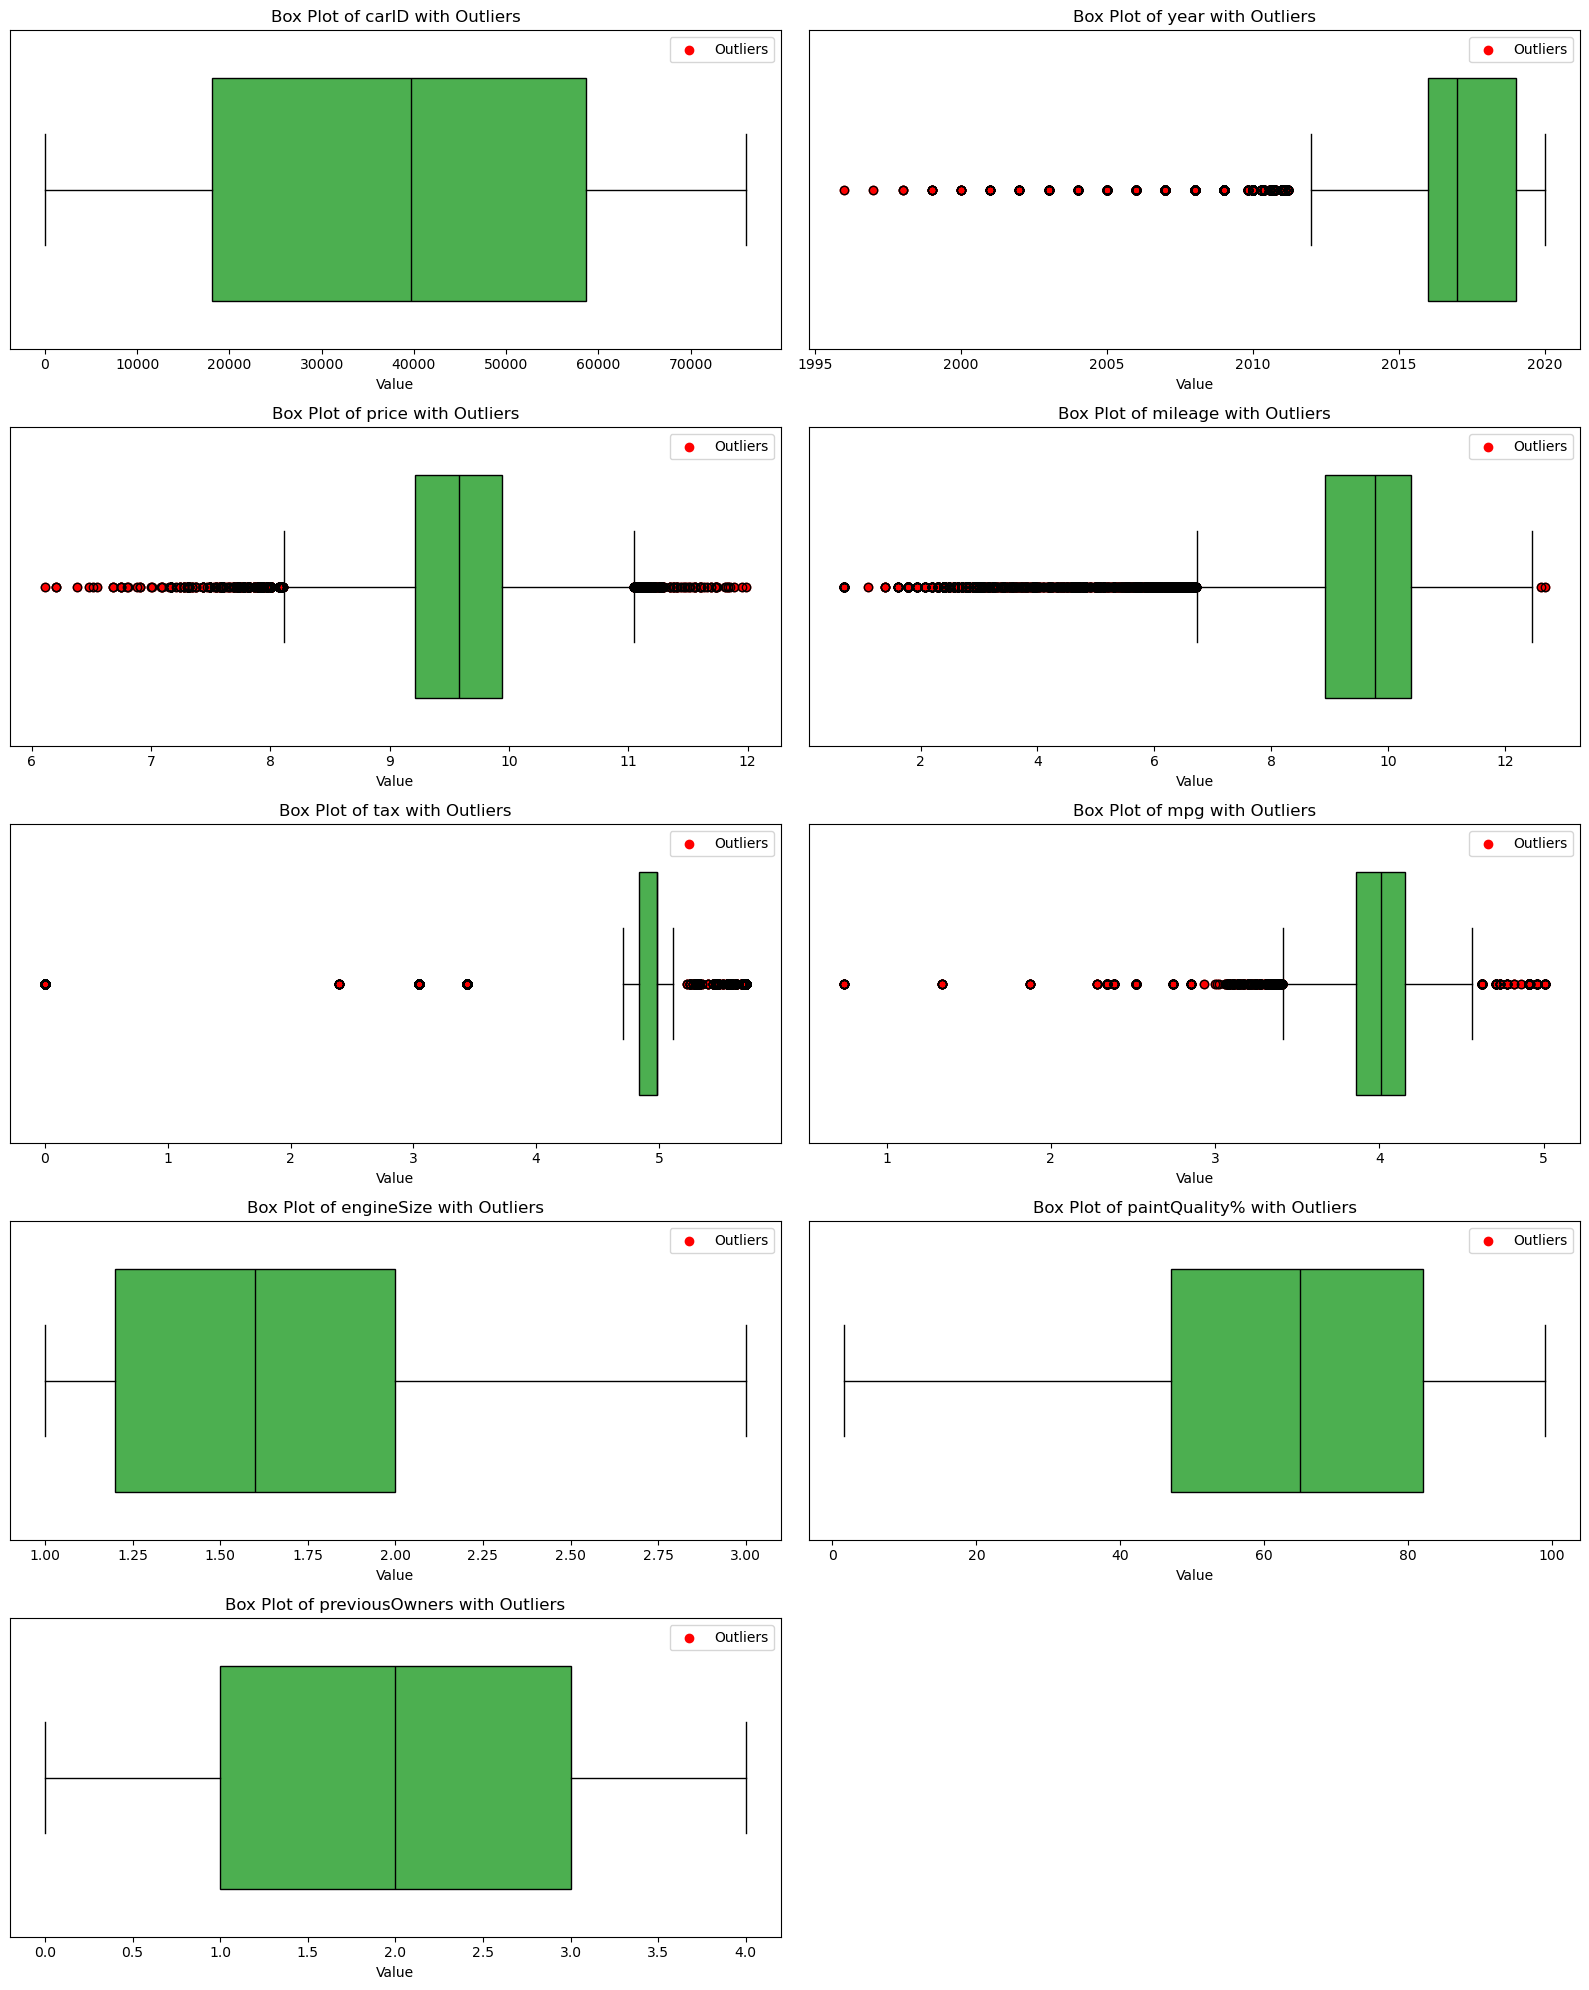

In [ ]:
f.plot_multiple_boxes_with_outliers(train_db.dropna(), train_db_numerical)

In [9]:
train_db["paintQuality%"].value_counts()

paintQuality%
34.000000     1147
94.000000     1128
54.000000     1114
32.000000     1107
88.000000     1099
              ... 
125.453599      23
2.725153        21
1.638913        19
125.188729      17
3.254760        15
Name: count, Length: 88, dtype: int64

In [ ]:
"""tax = train_db[train_db['tax'] > 400].shape[0]
mpg = train_db[train_db['mpg'] > 150].shape[0]
engineSize = train_db[train_db['engineSize'] > 3].shape[0]
mileage = train_db[train_db['mileage'] > 150000].shape[0]
price = train_db[train_db['price'] > 140000].shape[0]
year = train_db[train_db['year'] < 1990].shape[0]

print(f"""Outliers:
Tax: {tax},
MPG: {mpg},
Engine Size: {engineSize},
Mileage: {mileage},
Price: {price},
Year: {year}""")"""

Outliers:
Tax: 119,
MPG: 221,
Engine Size: 651,
Mileage: 37,
Price: 5,
Year: 2


In [ ]:
"""outlier_conditions = (
    (train_db['tax'] < 0) |
    (train_db['mpg'] > 150) |
    (train_db['engineSize'] > 3) |
    (train_db['mileage'] > 150000) |
    (train_db['price'] > 140000) |
    (train_db['year'] < 1990)
)"""

In [ ]:
"""train_db = train_db[~outlier_conditions]"""

In [103]:
# Rounding future Int values
train_db.loc[:, "year"] = train_db["year"].round()

# Removes every negative and irrational number from previousOwners
train_db.loc[(train_db['previousOwners'] < 0) | (train_db['previousOwners'] % 1 != 0),'previousOwners'] = np.nan

# Rounds every irrational number into having one precision digit
for col in train_db.select_dtypes(include="float64").columns:
    # Round each column to 1 digit after the decimal
    train_db[col] = train_db[col].round(1)

# Remove paintQuality% above 100
test_db.loc[test_db["paintQuality%"] > 100, "paintQuality%"] = np.nan

# Remove every negative value out of the numeric columns
for col in train_db.select_dtypes(include="float64").columns:
    train_db = f.negative_to_nan_columns(col,train_db)

In [98]:
# Select all nominal columns
nominal_cols = train_db.select_dtypes(include='object').columns

# Compute Cramér's V between all pairs
for i, col1 in enumerate(nominal_cols):
    for col2 in nominal_cols[i+1:]:
        v = f.cramers_v(train_db[col1], train_db[col2])
        print(f"Cramér's V between {col1} and {col2}: {v:.3f}")


Cramér's V between Brand and model: 0.996
Cramér's V between Brand and transmission: 0.298
Cramér's V between Brand and fuelType: 0.287
Cramér's V between model and transmission: 0.362
Cramér's V between model and fuelType: 0.467
Cramér's V between transmission and fuelType: 0.202


In [6]:


num_cols = train_db.select_dtypes(include='number').drop(columns=['carID', 'price'], errors='ignore').columns
cat_cols = train_db.select_dtypes(include=['object', 'category']).columns

# Try single and multi-column combinations up to this size
max_combo_size = 4 

print("\nTheil’s U directionally for Categorical Variables:")
for target in cat_cols:
    u_scores = {}
    
    for combo_size in range(1, max_combo_size + 1):
        for combo in combinations([c for c in cat_cols if c != target], combo_size):
            # Build a joint predictor variable by concatenating category values
            joint_name = " + ".join(combo)
            joint_var = train_db[list(combo)].astype(str).agg("_".join, axis=1)
            
            # Directional association: how much knowing combo tells about target
            u = f.theils_u(train_db[target], joint_var)
            u_scores[joint_name] = u

    # pick top combinations that best explain target
    top3 = sorted(u_scores.items(), key=lambda x: x[1], reverse=True)[:10]
    
    print(f"\nFor categorical column '{target}', best predictors:")
    for combo, u in top3:
        print(f"  U({target} | {combo}) = {u:.3f}")



Theil’s U directionally for Categorical Variables:

For categorical column 'Brand', best predictors:
  U(Brand | model + transmission + fuelType) = 0.982
  U(Brand | model + transmission) = 0.981
  U(Brand | model + fuelType) = 0.979
  U(Brand | model) = 0.977
  U(Brand | transmission + fuelType) = 0.133
  U(Brand | transmission) = 0.093
  U(Brand | fuelType) = 0.053

For categorical column 'model', best predictors:
  U(model | Brand + transmission + fuelType) = 0.562
  U(model | Brand + fuelType) = 0.538
  U(model | Brand + transmission) = 0.520
  U(model | Brand) = 0.494
  U(model | transmission + fuelType) = 0.132
  U(model | transmission) = 0.071
  U(model | fuelType) = 0.070

For categorical column 'transmission', best predictors:
  U(transmission | Brand + model + fuelType) = 0.327
  U(transmission | model + fuelType) = 0.317
  U(transmission | Brand + model) = 0.292
  U(transmission | model) = 0.282
  U(transmission | Brand + fuelType) = 0.230
  U(transmission | Brand) = 0.189


In [51]:

from itertools import combinations
def correlation_ratio(categories, values):
    df = pd.DataFrame({'cat': categories, 'val': values}).dropna()
    if df.empty:
        return 0.0
    group_stats = df.groupby('cat')['val'].agg(['mean', 'size'])
    overall_mean = df['val'].mean()
    num = (group_stats['size'] * (group_stats['mean'] - overall_mean) ** 2).sum()
    den = ((df['val'] - overall_mean) ** 2).sum()
    return np.sqrt(num / den) if den > 0 else 0.0

# Separate numeric and categorical columns
num_cols = train_db.select_dtypes(include='number').drop(columns=['carID', 'price'], errors='ignore').columns
cat_cols = train_db.select_dtypes(exclude='number').columns

for target in num_cols:
    scores = {}

    for num_paired in range(1, 3):
        # Numeric predictor combinations
        for combo in combinations([c for c in num_cols if c != target], num_paired):
            df = train_db[list(combo) + [target]].dropna()
            if df.empty:
                continue
            model = LinearRegression().fit(df[list(combo)], df[target])
            scores[combo] = model.score(df[list(combo)], df[target])

        # Categorical predictor combinations
        for cat_pair in combinations(cat_cols, num_paired):
            combined = train_db[list(cat_pair)].astype(str).agg('_'.join, axis=1)
            scores[cat_pair] = correlation_ratio(combined, train_db[target]) ** 2


    # --- Mixed numeric + categorical pairs  ---
    for num_col in [c for c in num_cols if c != target]:
        for cat_col in cat_cols:
            df = train_db[[num_col, cat_col, target]].dropna()
            if df.empty:
                continue
            # Discretize numeric variable into bins and combine with categorical
            numeric_bins = pd.cut(df[num_col], bins=15, duplicates='drop').astype(str)
            combined = df[cat_col].astype(str) + "_" + numeric_bins
            scores[(num_col, cat_col)] = correlation_ratio(combined, df[target]) ** 2

    # --- Top 3 helpers ---
    top3 = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:3]
    print(f"\nFor numerical column '{target}', top helpers (R² or η²):")
    for combo, score in top3:
        print(f" {combo} => {score:.3f}")



For numerical column 'year', top helpers (R² or η²):
 ('mileage', 'model') => 0.589
 ('mileage', 'fuelType') => 0.511
 ('mileage', 'Brand') => 0.508

For numerical column 'mileage', top helpers (R² or η²):
 ('year', 'model') => 0.495
 ('year', 'Brand') => 0.457
 ('year', 'fuelType') => 0.456

For numerical column 'tax', top helpers (R² or η²):
 ('year', 'model') => 0.475
 ('mpg', 'model') => 0.439
 ('mpg', 'Brand') => 0.363

For numerical column 'mpg', top helpers (R² or η²):
 ('model', 'fuelType') => 0.564
 ('tax', 'model') => 0.490
 ('engineSize', 'model') => 0.467

For numerical column 'engineSize', top helpers (R² or η²):
 ('mpg', 'model') => 0.783
 ('model', 'fuelType') => 0.748
 ('tax', 'model') => 0.740

For numerical column 'paintQuality%', top helpers (R² or η²):
 ('mileage', 'model') => 0.025
 ('year', 'model') => 0.018
 ('previousOwners', 'model') => 0.013

For numerical column 'previousOwners', top helpers (R² or η²):
 ('paintQuality%', 'model') => 0.030
 ('mileage', 'mode

### -----POR DAR CLEAN UP-----

In [104]:
# Safely convert previousOwners and year to nullable integers
train_db["previousOwners"] = pd.to_numeric(train_db["previousOwners"], errors='coerce').round().astype("Int64")
train_db["year"] = pd.to_numeric(train_db["year"], errors='coerce').round().astype("Int64")

# Handle Brand for i3
idx_to_drop = train_db[(train_db['model'] == 'i3') & (train_db['Brand'].isna())].index
train_db = train_db.drop(idx_to_drop)

# Fill categorical columns
train_db = f.fill_NaN_with_categorical(train_db, "Brand", ["model","transmission","fuelType"])
train_db = f.fill_NaN_with_categorical(train_db, "Brand", ["model","transmission"])
train_db = f.fill_NaN_with_categorical(train_db, "model", ["Brand","transmission","fuelType"])
train_db = f.fill_NaN_with_categorical(train_db, "model", ["Brand","transmission"])
train_db = f.fill_NaN_with_categorical(train_db, "mpg", ["model","fuelType"])
train_db["transmission"] = train_db["transmission"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
train_db["fuelType"] = train_db["fuelType"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

# Fill numeric columns with mixed helper approach
train_db = f.fill_NaN_with_mixed(train_db, "year", "model", "mileage")
train_db = f.fill_NaN_with_mixed(train_db, "mileage", "model", "year")
train_db = f.fill_NaN_with_mixed(train_db, "tax", "model", "year")
train_db = f.fill_NaN_with_mixed(train_db, "engineSize", "model", "tax")

# Fill numeric columns with median
train_db["paintQuality%"] = train_db["paintQuality%"].transform(lambda x: x.fillna(x.median()))
train_db["previousOwners"] = train_db["previousOwners"].transform(lambda x: x.fillna(x.median())).round().astype("Int64")

# Drop any remaining NaNs
train_db = train_db.dropna()


c:\Users\ricar\Documents\GitHub\ProjetoML\functionsML.py:54: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filled = df.groupby(helper_cols, dropna=False, group_keys=False ).apply(fill_group_cat, target_col)
c:\Users\ricar\Documents\GitHub\ProjetoML\functionsML.py:54: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filled = df.groupby(helper_cols, dropna=False, group_keys=False ).apply(fill_group_cat, target_col)


In [53]:
train_db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57813 entries, 1 to 75972
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           57813 non-null  int64  
 1   Brand           57813 non-null  object 
 2   model           57813 non-null  object 
 3   year            57813 non-null  Int64  
 4   price           57813 non-null  float64
 5   transmission    57813 non-null  object 
 6   mileage         57813 non-null  float64
 7   fuelType        57813 non-null  object 
 8   tax             57813 non-null  float64
 9   mpg             57813 non-null  float64
 10  engineSize      57813 non-null  float64
 11  paintQuality%   57813 non-null  float64
 12  previousOwners  57813 non-null  Int64  
dtypes: Int64(2), float64(6), int64(1), object(4)
memory usage: 8.3+ MB


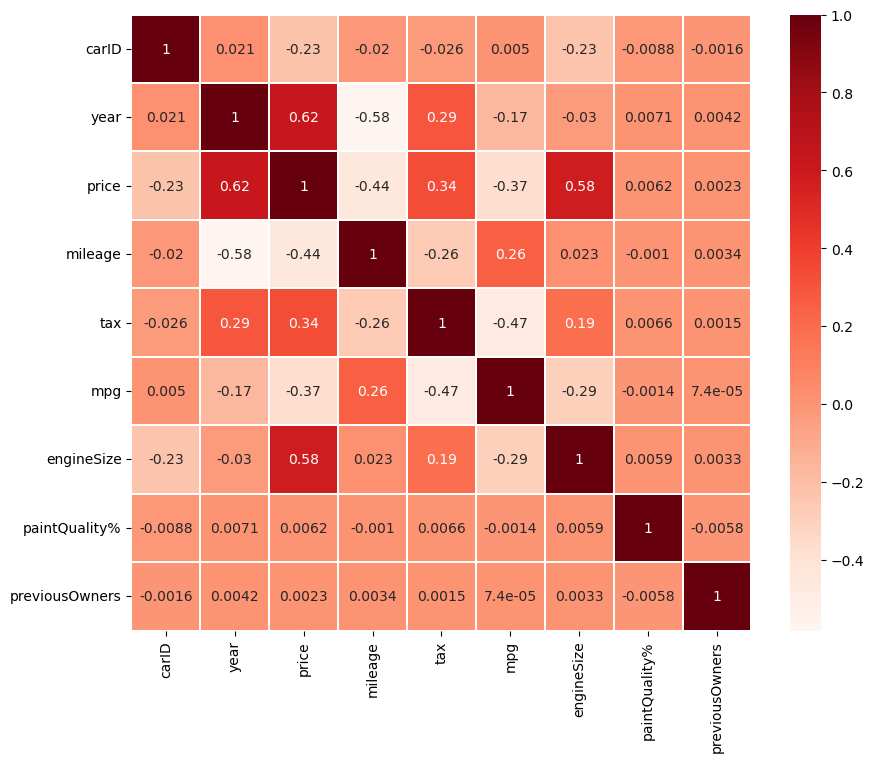

In [54]:
# Remove rows with missing values
temp = train_db.dropna()

# Select numerical columns for correlation analysis
corr_data = temp.select_dtypes(include=["number"])

# Compute the Pearson correlation matrix
correlation_matrix = corr_data.corr(method="pearson")

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap = plt.cm.Reds, linewidths=0.1)
plt.show()

In [105]:
one_hot = pd.get_dummies(train_db["Brand"], drop_first=True).astype(int)

train_db = pd.concat([train_db, one_hot], axis=1)

train_db['transmission'] = train_db['transmission'].replace('other', 'unknown')

one_hot2 = pd.get_dummies(train_db["transmission"], drop_first=True).astype(int)

train_db = pd.concat([train_db, one_hot2], axis=1)

train_db["fuelType"] = train_db["fuelType"].replace('other', 'electric')

one_hot3 = pd.get_dummies(train_db["fuelType"], drop_first=True).astype(int)

train_db = pd.concat([train_db, one_hot3], axis=1)


In [ ]:
"""for col in ["manual", "semi-auto", "unknown","hybrid"]:
    print(train_db[col].value_counts())"""

manual
1    43144
0    32819
Name: count, dtype: int64
semi-auto
0    59092
1    16871
Name: count, dtype: int64
unknown
0    75222
1      741
Name: count, dtype: int64
hybrid
0    73738
1     2225
Name: count, dtype: int64


In [106]:
# Compute mean Price for each model
target_mean = train_db.groupby('model')['price'].mean()

# Map the mean back to a new column
train_db['model_encoded'] = train_db['model'].map(target_mean)

print(train_db[['model', 'price', 'model_encoded']].head(100))

        model  price  model_encoded
0        golf   10.0       9.662208
1       yaris    9.5       9.226360
2          q2   10.1      10.028401
3      fiesta    9.4       9.189754
4    2 series   10.0       9.842276
..        ...    ...            ...
95        i20    9.2       9.037651
96     fiesta    9.1       9.189754
97      focus    9.2       9.461184
98  gls class   11.1      10.735714
99      b-max    9.2       9.008065

[100 rows x 3 columns]


In [107]:
X = train_db.drop(columns=["price","carID"])
y = train_db["price"]
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 0, 
                                                  shuffle = True)

In [108]:
X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)

X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)

# repeat for val

X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)

X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)

In [109]:
scaler = MinMaxScaler()

#fit to training data
scaler.fit(X_train_num)

#transform the data
X_train_num_scaled = scaler.transform(X_train_num) # this will return an array

# Convert the array to a pandas dataframe
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train.index)

X_val_num_scaled = scaler.transform(X_val_num)
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns).set_index(X_val.index)


#show results
X_train_num_scaled

,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,bmw,ford,hyundai,...,skoda,toyota,vw,manual,semi-auto,unknown,electric,hybrid,petrol,model_encoded
16992,0.875000,0.823529,0.877193,0.837209,0.133333,0.291581,0.50,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.455037
7987,0.958333,0.546218,0.877193,0.744186,0.022222,0.661191,1.00,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.452005
75276,0.958333,0.714286,0.877193,0.744186,0.222222,0.558522,0.25,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.551145
65189,0.750000,0.848739,0.596491,0.813953,0.222222,0.958932,0.50,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.523996
32365,0.958333,0.731092,0.877193,0.744186,0.222222,0.753593,0.25,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.558829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21256,0.875000,0.756303,0.842105,0.767442,0.088889,0.016427,1.00,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.455037
45928,0.875000,0.789916,0.842105,0.767442,0.088889,0.579055,0.50,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.455037
42647,0.916667,0.764706,0.877193,0.813953,0.000000,0.548255,0.00,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.452005
43601,0.750000,0.840336,0.526316,0.790698,0.044444,0.989733,0.50,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.478915


In [110]:
for var in X_train_cat:
    f.TestCorrelationRatio(X_train_cat[var],y_train, var)

Brand is IMPORTANT for prediction (η = 0.562)
model is IMPORTANT for prediction (η = 0.750)
transmission is IMPORTANT for prediction (η = 0.567)
fuelType is IMPORTANT for prediction (η = 0.248)


In [111]:
#no of features
nof_list=np.arange(1,len(X_train_num_scaled.columns)+1)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = LinearRegression()
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train)
    X_val_rfe = rfe.transform(X_val_num_scaled)
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on validation data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 21
Score with 21 features: 0.891738


In [112]:
model = LinearRegression()

rfe = RFE(estimator = model, n_features_to_select = 21)

train_db_rfe = rfe.fit_transform(X = X_train_num_scaled, y = y_train)

rfe.support_

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [113]:
X_train_num_scaled.columns

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%',
       'previousOwners', 'bmw', 'ford', 'hyundai', 'mercedes', 'opel', 'skoda',
       'toyota', 'vw', 'manual', 'semi-auto', 'unknown', 'electric', 'hybrid',
       'petrol', 'model_encoded'],
      dtype='object')

In [115]:
rfe.ranking_

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [114]:
selected_features = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
selected_features

year               True
mileage            True
tax                True
mpg                True
engineSize         True
paintQuality%      True
previousOwners    False
bmw                True
ford               True
hyundai            True
mercedes           True
opel               True
skoda              True
toyota             True
vw                 True
manual             True
semi-auto          True
unknown            True
electric           True
hybrid             True
petrol             True
model_encoded      True
dtype: bool

In [116]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

reg = LassoCV()


reg.fit(X_train_num_scaled, y_train)

coef = pd.Series(reg.coef_, index = X_train_num_scaled.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")


Lasso picked 22 variables and eliminated the other 0 variables


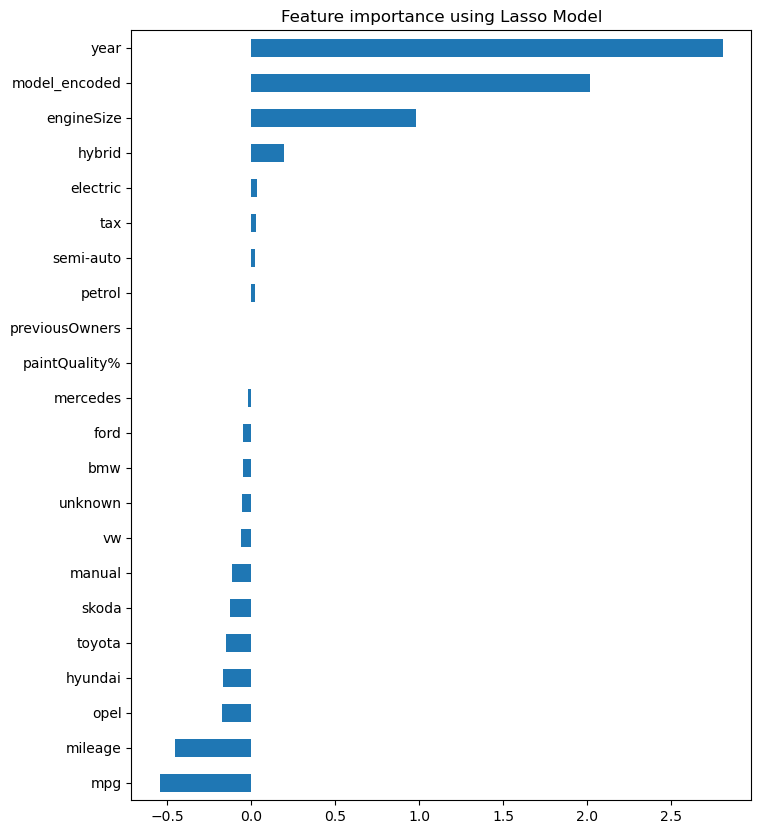

In [117]:
plot_importance(coef,'Lasso')

<hr>

### Numerical Data

| Predictor | Spearman | RFE LR| Lasso | What to do? (One possible way to "solve") | 
| --- | --- | --- | --- |---|
| year | Keep? | Keep | Keep | Include in the model |
| engineSize | Keep | Keep |Keep| Include in the model |
| tax | Keep?| Keep | Discard | Try with and without |
| previousOwners | Keep? | Discard | Discard | Discard |
| paintQuality% | Keep? | Discard | Discard | Discard |
| mpg | Keep? | Keep | Keep? | Try with and without |
| mileage | Keep | Keep | Keep | Keep |

<hr>


### Categorical Data

| Predictor | Correlation Ratio | 
| --- | --- | 
| Brand | Keep |  
|  model | Keep | 
| transmission | Keep |
| fuelType| Keep? |


<hr>



In [118]:
X_train_num_scaled = X_train_num_scaled.drop(columns=['previousOwners', "paintQuality%"])

X_val_num_scaled = X_val_num_scaled.drop(columns=['previousOwners', "paintQuality%"])

In [119]:
# 3. Fit model
model = LinearRegression()
model.fit(X_train_num_scaled, y_train)

# 4. Predict
y_pred = model.predict(X_val_num_scaled)

# 5. Evaluate
print(f"R²: {r2_score(y_val, y_pred):.3f}")
print(f"MAE: {mean_absolute_error(y_val, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_val, y_pred)):.2f}")

R²: 0.892
MAE: 0.13
RMSE: 0.17


In [120]:
# Drop irrelevant column
test_db = test_db.drop(columns="hasDamage")

# Lowercase text columns
text_cols = test_db.select_dtypes(include=["object"]).columns
test_db[text_cols] = test_db[text_cols].apply(lambda x: x.str.lower() if x.dtype=="object" else x)

# Loop and fix all categorical columns (if your fix_typos function works for test set)
for col in test_db.select_dtypes(include="object").columns:
    test_db = f.fix_typos(col, test_db)

# Apply the same filtering rules
test_db.loc[test_db["mileage"] < 0, "mileage"] = np.nan
test_db.loc[test_db["tax"] < 0, "tax"] = np.nan
test_db.loc[~test_db["mpg"].between(0, 150), "mpg"] = np.nan
test_db.loc[~test_db["engineSize"].between(1, 6), "engineSize"] = np.nan
test_db.loc[test_db["paintQuality%"] > 100, "paintQuality%"] = np.nan
test_db.loc[~test_db["year"].between(1990, 2020), "year"] = np.nan
test_db.loc[~test_db["previousOwners"].between(0, 4), "previousOwners"] = np.nan

# Apply the same transformations
test_db['mileage'] = np.log1p(test_db['mileage'])
test_db['mpg'] = np.log1p(test_db['mpg'])

# Use the SAME clipping bounds from training data
test_db['tax'] = test_db['tax'].clip(train_thresholds['tax_lower'], train_thresholds['tax_upper'])
test_db['tax'] = np.log1p(test_db['tax'])

# Use the SAME clipping bounds from training data  
test_db['engineSize'] = test_db['engineSize'].clip(train_thresholds['engineSize_lower'], train_thresholds['engineSize_upper'])

# Rounding future Int values
test_db.loc[:, "year"] = test_db["year"].round()

# Remove negative/irrational previousOwners
test_db.loc[(test_db['previousOwners'] < 0) | (test_db['previousOwners'] % 1 != 0),'previousOwners'] = np.nan

# Round floats to 1 digit
for col in test_db.select_dtypes(include="float64").columns:
    test_db[col] = test_db[col].round(1)

# Remove paintQuality% above 100
test_db.loc[test_db["paintQuality%"] > 100, "paintQuality%"] = np.nan

# Remove negative values from numeric columns
for col in test_db.select_dtypes(include="float64").columns:
    test_db = f.negative_to_nan_columns(col, test_db)

# Safely convert previousOwners and year to nullable integers
test_db["previousOwners"] = pd.to_numeric(test_db["previousOwners"], errors='coerce').round().astype("Int64")
test_db["year"] = pd.to_numeric(test_db["year"], errors='coerce').round().astype("Int64")

# Fill categorical columns using the same functions as training
test_db = f.fill_NaN_with_categorical(test_db, "Brand", ["model","transmission","fuelType"])
test_db = f.fill_NaN_with_categorical(test_db, "Brand", ["model","transmission"])
test_db = f.fill_NaN_with_categorical(test_db, "model", ["Brand","transmission","fuelType"])
test_db = f.fill_NaN_with_categorical(test_db, "model", ["Brand","transmission"])
test_db = f.fill_NaN_with_categorical(test_db, "mpg", ["model","fuelType"])
test_db["transmission"] = test_db["transmission"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
test_db["fuelType"] = test_db["fuelType"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

# Fill numeric columns with mixed helper approach
test_db = f.fill_NaN_with_mixed(test_db, "year", "model", "mileage")
test_db = f.fill_NaN_with_mixed(test_db, "mileage", "model", "year")
test_db = f.fill_NaN_with_mixed(test_db, "tax", "model", "year")
test_db = f.fill_NaN_with_mixed(test_db, "engineSize", "model", "tax")

# Fill numeric columns with median
test_db["paintQuality%"] = test_db["paintQuality%"].transform(lambda x: x.fillna(x.median()))
test_db["previousOwners"] = test_db["previousOwners"].transform(lambda x: x.fillna(x.median())).round().astype("Int64")

numeric_cols = test_db.select_dtypes(include=["number"]).columns.drop("carID", errors='ignore')

for col in numeric_cols:
    # Convert to float to safely handle NaNs and group means
    test_db[col] = test_db[col].astype(float)
    
    # Compute model mean
    category_means = test_db.groupby("model")[col].transform('mean')
    
    # Fill NaNs with category mean
    test_db[col] = test_db[col].fillna(category_means)
    
    # Fill any remaining NaNs with global mean
    global_mean = test_db[col].mean()
    test_db[col] = test_db[col].fillna(global_mean)
    
    # Optional: convert back to integer if column was originally integer
    if "Int64" in str(test_db[col].dtype):
        test_db[col] = test_db[col].round().astype("Int64")



        
# One-hot encode categorical columns
brand_dummies = pd.get_dummies(test_db["Brand"], drop_first=True).astype(int)
test_db = pd.concat([test_db, brand_dummies], axis=1)

# Merge rare transmission values
test_db['transmission'] = test_db['transmission'].replace('other', 'unknown')
transmission_dummies = pd.get_dummies(test_db["transmission"], drop_first=True).astype(int)
test_db = pd.concat([test_db, transmission_dummies], axis=1)

# Merge rare fuelType values
test_db["fuelType"] = test_db["fuelType"].replace('other', 'electric')
fuel_dummies = pd.get_dummies(test_db["fuelType"], drop_first=True).astype(int)
test_db = pd.concat([test_db, fuel_dummies], axis=1)


# Create mapping dictionary from train_df
mapping = train_db.set_index("model")["model_encoded"].to_dict()

# Compute global mean in case test has unseen models
global_mean = train_db["model_encoded"].mean()

# Map test_df model to encoded value; unseen models get global_mean
test_db["model_encoded"] = test_db["model"].map(mapping).fillna(global_mean)

# Prepare features (exclude price and ID if present)
X_test = test_db.drop(columns=["carID"], errors='ignore')  # ignore if price not in test
X_test_num = X_test.select_dtypes(include=np.number).set_index(X_test.index)

# Scale using the same scaler fitted on training data
X_test_num_scaled = scaler.transform(X_test_num)

X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns = X_test_num.columns).set_index(X_test.index)

X_test_num_scaled = X_test_num_scaled.drop(columns=[ 'previousOwners', "paintQuality%"])

c:\Users\ricar\Documents\GitHub\ProjetoML\functionsML.py:54: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filled = df.groupby(helper_cols, dropna=False, group_keys=False ).apply(fill_group_cat, target_col)
c:\Users\ricar\Documents\GitHub\ProjetoML\functionsML.py:54: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filled = df.groupby(helper_cols, dropna=False, group_keys=False ).apply(fill_group_cat, target_col)


In [121]:
y_test_pred = model.predict(X_test_num_scaled)

# Add predictions to the test DataFrame
test_db['price'] = np.expm1(y_test_pred)

# Create a new DataFrame with only carID and predicted price
submission = test_db[['carID', 'price']].copy()

# Save to CSV
submission.to_csv("predicted_prices.csv", index=False)
